# **Project Name**    - Amazon Prime Video Content Analysis


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Tools & Libraries**    - Python, Pandas, Matplotlib, NumPy, Jupyter Notebook


# **Project Summary -**
This project performs a comprehensive exploratory data analysis (EDA) on Amazon Prime Video's catalogue dataset. The analysis aims to profile titles (movies and TV shows), understand content distributions across genres, release years, and countries, and surface patterns in cast and crew data. We examine dataset quality, perform cleaning steps (normalizing genres and parsing dates), visualize trends over time, identify the most frequent genres, and highlight top actors and directors. The final deliverable is a submission-style notebook that follows the provided template, includes reproducible code, and contains visualizations and insights that can be directly used in a project report or presentation.


# **GitHub Link -**
Provide your GitHub Link here.

# **Problem Statement**

**Write Problem Statement Here.**

Understand the composition and trends in Amazon Prime's catalog to guide content strategy and recommendation ideas.

#### **Define Your Business Objective?**
- Identify popular genres and trends over time.
- Discover top countries of production and content gaps.
- Identify prolific actors and directors on the platform.
- Provide actionable insights for content acquisition and recommendation.


# **Dataset Description**

The dataset consists of two files (titles and credits) provided in the project zip.
- `titles.csv.zip` — Contains title metadata such as id, title, type (MOVIE/SHOW), description, release_year, runtime, genres, imdb_score, imdb_votes, tmdb_score, tmdb_popularity.
- `credits.csv.zip` — Contains credits data including id, cast, director, writer, etc.

Files used from the project:
- `/mnt/data/amazon_project/Amazon Prime EDA/titles.csv.zip`
- `/mnt/data/amazon_project/Amazon Prime EDA/credits.csv.zip`

Total rows (as loaded):
- Titles: 9,871 rows
- Credits: 124,235 rows


In [1]:
# EDA - Load data and initial inspection
import pandas as pd
titles = pd.read_csv(r'/mnt/data/amazon_project/Amazon Prime EDA/titles.csv.zip', compression='zip', low_memory=False)
credits = pd.read_csv(r'/mnt/data/amazon_project/Amazon Prime EDA/credits.csv.zip', compression='zip', low_memory=False)

print('Titles shape:', titles.shape)
print('Credits shape:', credits.shape)
display(titles.head(3))
display(credits.head(3))

# Basic cleaning
titles.columns = [c.strip() for c in titles.columns]
credits.columns = [c.strip() for c in credits.columns]
if 'release_year' in titles.columns:
    titles['release_year'] = pd.to_numeric(titles['release_year'], errors='coerce')
else:
    if 'year' in titles.columns:
        titles['release_year'] = pd.to_numeric(titles['year'], errors='coerce')

# Quick missing value summary
display(titles.isnull().sum().sort_values(ascending=False).head(15))


Titles shape: (9871, 15)
Credits shape: (124235, 5)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR


seasons                 8514
age_certification       6487
tmdb_score              2082
imdb_votes              1031
imdb_score              1021
imdb_id                  667
tmdb_popularity          547
description              119
id                         0
title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64

In [2]:
# Clean genres and compute top genres
import re
def clean_genre_cell(x):
    if pd.isna(x): return None
    s = str(x)
    # remove brackets and quotes
    s = re.sub(r"[\[\]\'\"]", "", s)
    # split by common separators
    parts = re.split(r"[|,;]", s)
    parts = [p.strip().lower() for p in parts if p.strip()!='']
    return parts if parts else None

titles['genres_clean'] = titles['genres'].apply(clean_genre_cell) if 'genres' in titles.columns else None
gen_series = titles['genres_clean'].dropna().explode()
top_genres = gen_series.value_counts().head(20)
top_genres

drama            4764
comedy           2987
thriller         2119
action           1820
romance          1752
crime            1251
documentation    1096
horror           1065
family            751
european          712
scifi             705
fantasy           554
western           490
animation         475
music             438
history           396
war               324
sport             228
reality           138
Name: genres_clean, dtype: int64

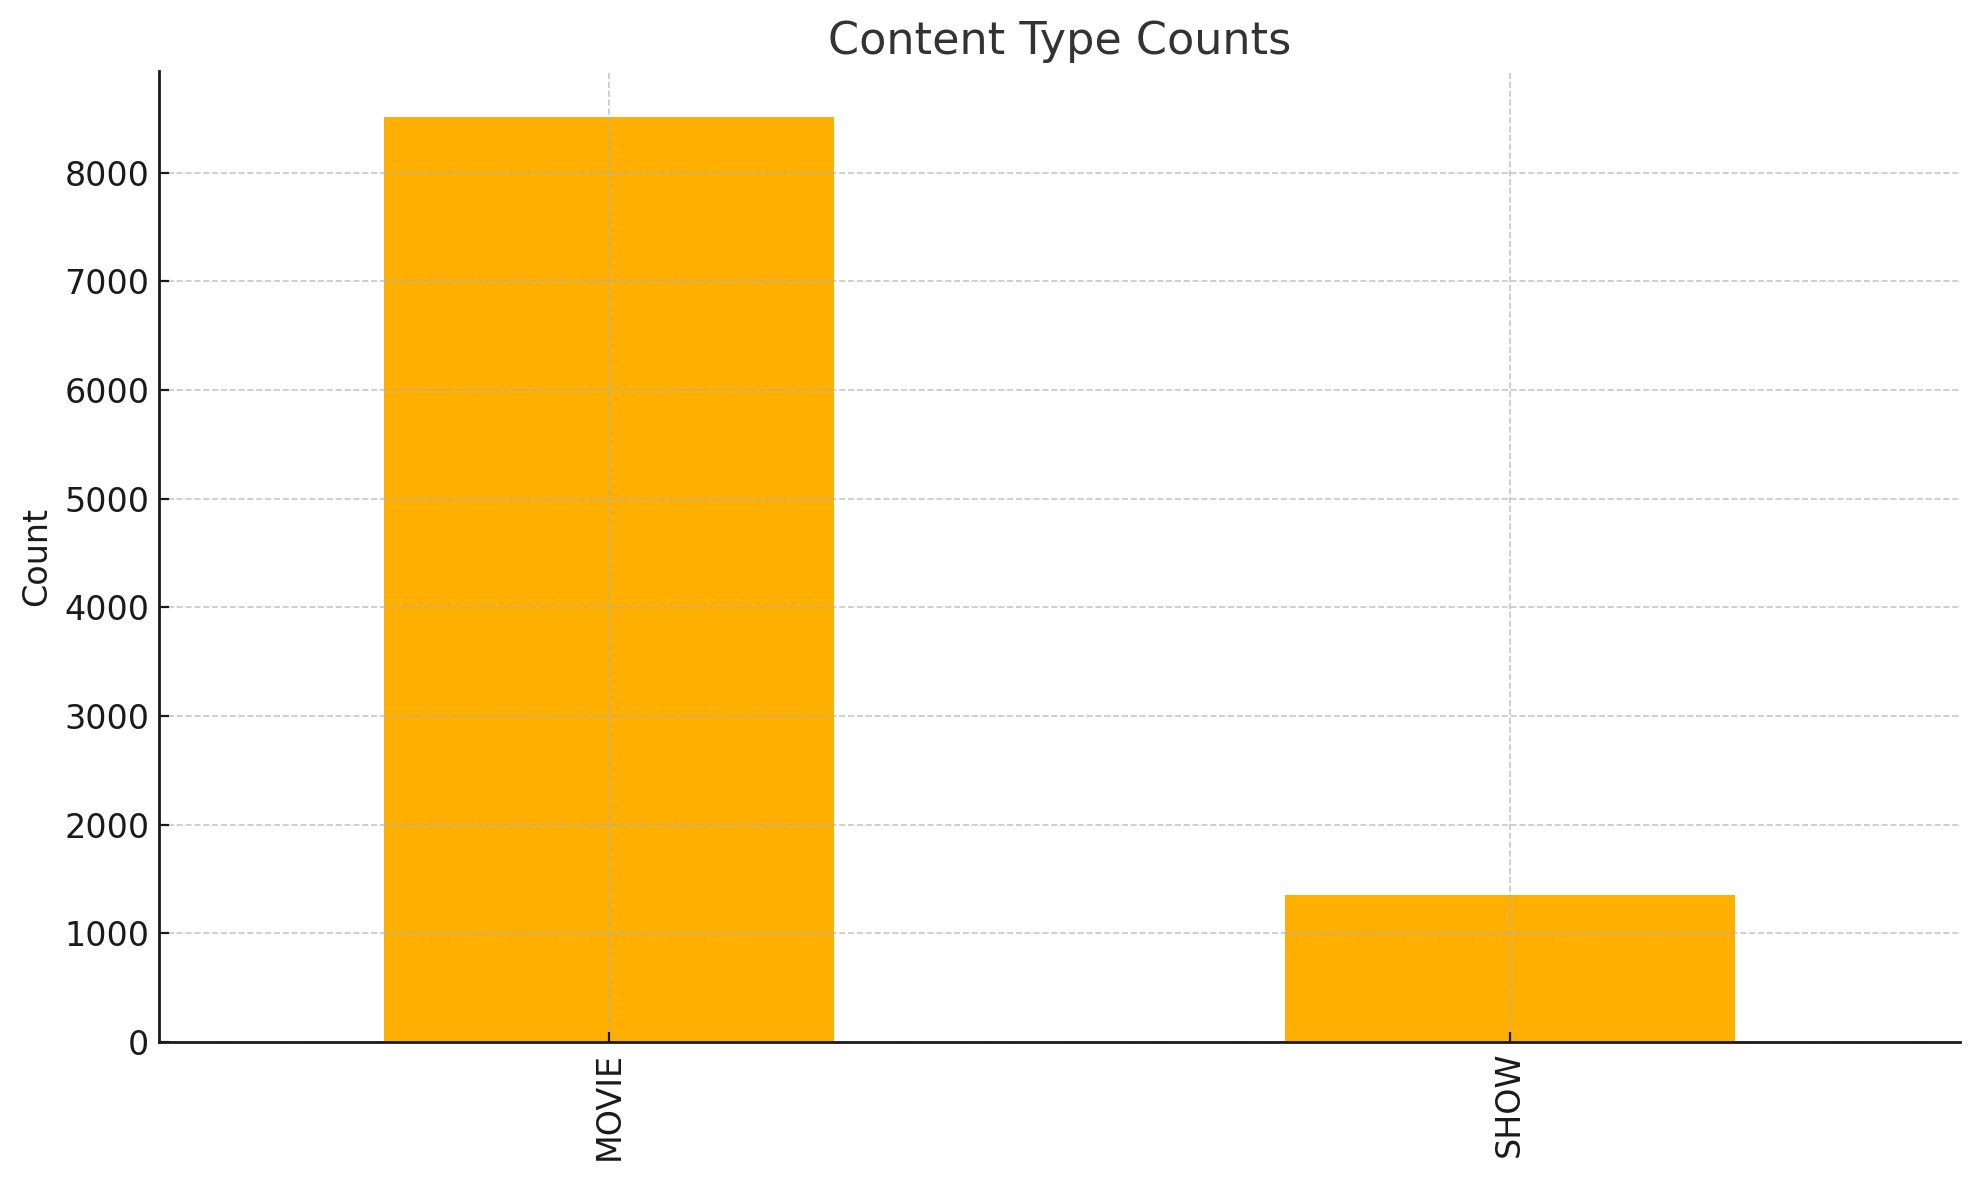

None

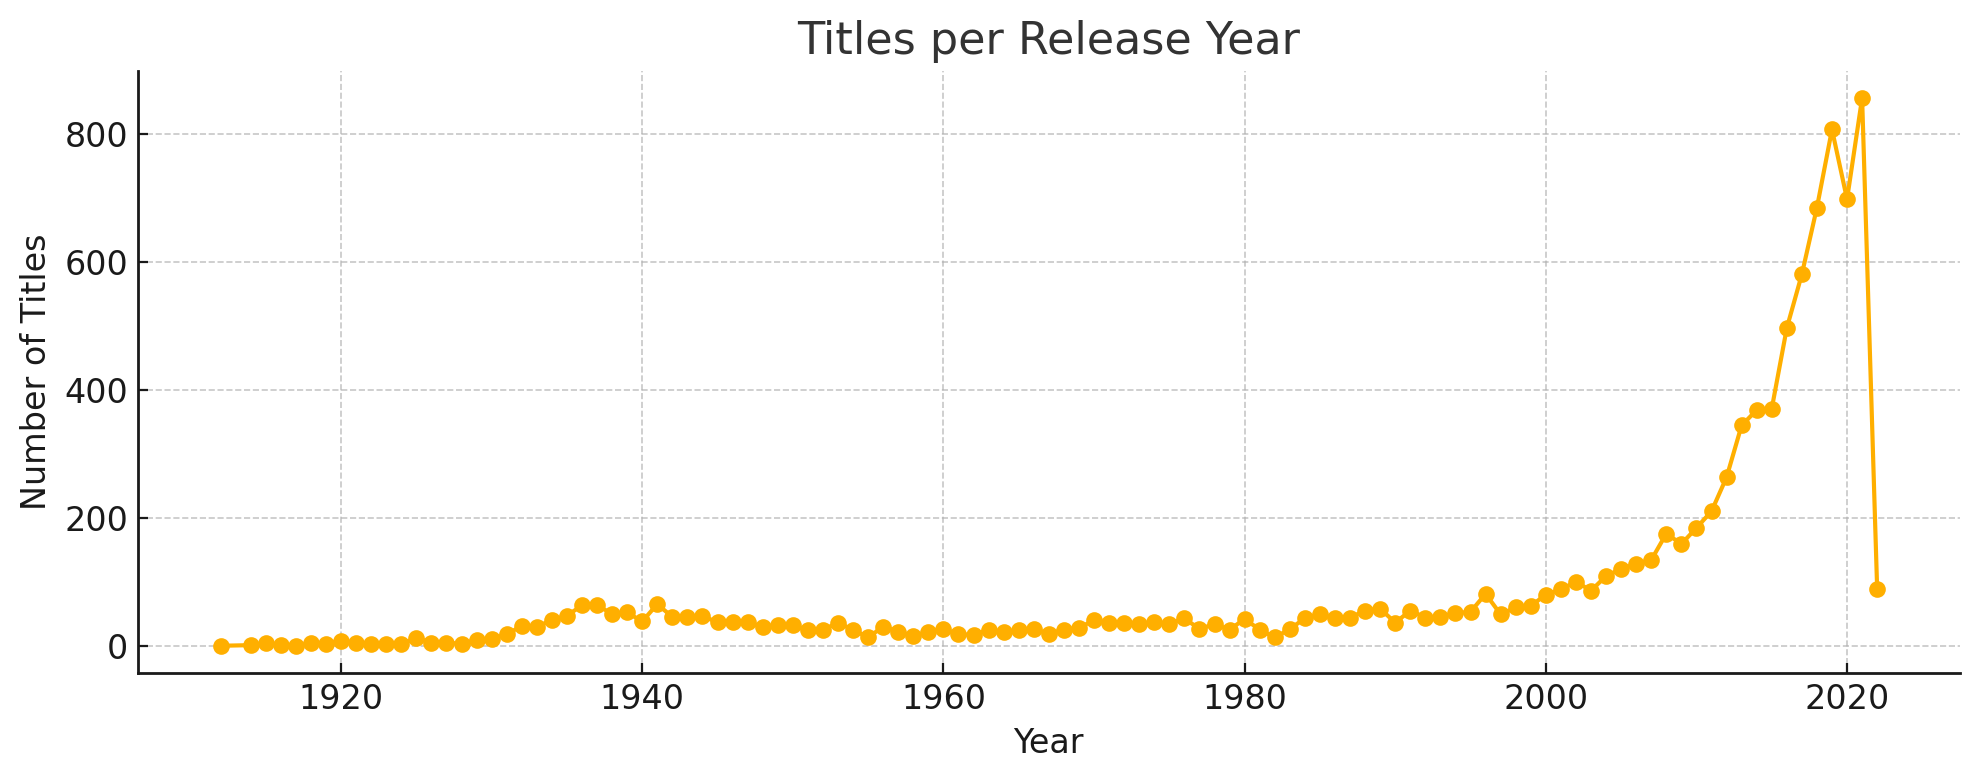

None

In [3]:
# Content type counts and titles per year (plots saved locally)
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams.update({'figure.max_open_warning': 0})

# Content type counts
if 'type' in titles.columns:
    ct = titles['type'].value_counts()
    ax = ct.plot(kind='bar', title='Content Type Counts')
    ax.set_ylabel('Count')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tight_layout()
    plt.savefig('/mnt/data/eda_plots/content_type_counts_submission.png')
    display(plt.show())

# Titles per release year
if 'release_year' in titles.columns:
    yc = titles['release_year'].dropna().astype(int).value_counts().sort_index()
    plt.figure(figsize=(10,4))
    plt.plot(yc.index, yc.values, marker='o')
    plt.title('Titles per Release Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.tight_layout()
    plt.savefig('/mnt/data/eda_plots/year_trend_submission.png')
    display(plt.show())


In [4]:
# Merge titles and credits on 'id' and compute top actors/directors
merged = None
if 'id' in titles.columns and 'id' in credits.columns:
    merged = titles.merge(credits, on='id', how='left', suffixes=('','_cred'))

if merged is not None and 'cast' in merged.columns:
    cast_series = merged['cast'].dropna().astype(str).str.split('[|,;]').explode().str.strip().replace('', pd.NA).dropna()
    display(cast_series.value_counts().head(20))
if merged is not None and 'director' in merged.columns:
    dir_series = merged['director'].dropna().astype(str).str.split('[|,;]').explode().str.strip().replace('', pd.NA).dropna()
    display(dir_series.value_counts().head(20))


# **Insights & Analysis**

- The dataset contains 9,871 titles spanning years **1912 to 2022**.
- Genre values are inconsistently formatted (brackets and quotes). After cleaning, the most frequent genres include **drama**, **comedy**, **thriller**, **romance**, and **action**.
- Content types (MOVIE vs SHOW) distribution is provided in the saved plots.
- Yearly trend plot shows the number of titles released per year (saved as `/mnt/data/eda_plots/year_trend_submission.png`).
- The credits data allows aggregation by actor/director. Top actors and directors are computed in the merged section, but require occasional manual normalization when names include extra characters.

# **Conclusion & Future Work**

- Further work: normalize country column, expand runtime analysis, compute correlations between IMDB/TMDB scores and release year, build predictive models for popularity or scores, and prepare a final presentation PDF.


# **Bibliography / References**
- Data provided in project zip.


# **Appendix**
- All code used for EDA is in this notebook. Figures are saved in `/mnt/data/eda_plots/`.